# load the data

In [20]:
import pandas as pd
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img

In [4]:
pp = r'C:\Users\ElementQi\Desktop\dataScienceProgramming\pythonProject\data\GTSRB\Final_Training\Images\00000\00000_00000.ppm'
img_size = (32,32)
img1 = load_img(pp, target_size=img_size, color_mode='grayscale')

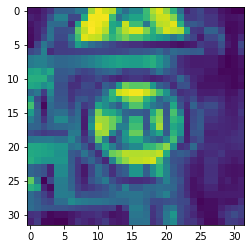

In [5]:
plt.imshow(img1)

In [13]:
exposure.equalize_hist(img_to_array(img1))

array([[[0.07386553],
        [0.05815741],
        [0.18847656],
        ...,
        [0.02900598],
        [0.00350108],
        [0.00097656]],

       [[0.15960563],
        [0.10742188],
        [0.21972656],
        ...,
        [0.05815741],
        [0.07386553],
        [0.10742188]],

       [[0.0859375 ],
        [0.17495013],
        [0.25292969],
        ...,
        [0.02900598],
        [0.02900598],
        [0.0859375 ]],

       ...,

       [[0.64935173],
        [0.58992686],
        [0.52734375],
        ...,
        [0.27780086],
        [0.32714844],
        [0.36091257]],

       [[0.2890625 ],
        [0.31044299],
        [0.13631358],
        ...,
        [0.36091257],
        [0.453125  ],
        [0.36091257]],

       [[0.17495013],
        [0.3515625 ],
        [0.01433677],
        ...,
        [0.36091257],
        [0.3515625 ],
        [0.2890625 ]]])

In [18]:
hist_equalized = exposure.equalize_hist((img_to_array(img1)/255).clip(0, 1))
hist_equalized

array([[[0.07386551],
        [0.05815736],
        [0.18847656],
        ...,
        [0.02900595],
        [0.00350108],
        [0.00097656]],

       [[0.1596056 ],
        [0.10742188],
        [0.21972656],
        ...,
        [0.05815736],
        [0.07386551],
        [0.10742188]],

       [[0.0859375 ],
        [0.17495013],
        [0.25292969],
        ...,
        [0.02900595],
        [0.02900595],
        [0.0859375 ]],

       ...,

       [[0.64935175],
        [0.58992678],
        [0.52734375],
        ...,
        [0.27780073],
        [0.32714844],
        [0.36091249]],

       [[0.2890625 ],
        [0.31044299],
        [0.13631359],
        ...,
        [0.36091249],
        [0.453125  ],
        [0.36091249]],

       [[0.17495013],
        [0.3515625 ],
        [0.01433677],
        ...,
        [0.36091249],
        [0.3515625 ],
        [0.2890625 ]]])

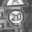

In [26]:
img1

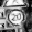

In [24]:
array_to_img(hist_equalized)

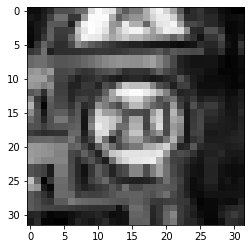

In [28]:
plt.imshow(img1, cmap='gray')

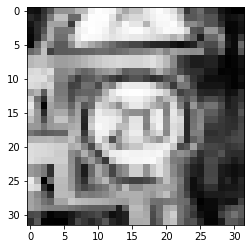

In [27]:
plt.imshow(array_to_img(hist_equalized), cmap='gray')

In [16]:
(img_to_array(img1)/255).clip(0, 1)

array([[[0.3019608 ],
        [0.29803923],
        [0.3372549 ],
        ...,
        [0.28627452],
        [0.26666668],
        [0.2627451 ]],

       [[0.32941177],
        [0.3137255 ],
        [0.34901962],
        ...,
        [0.29803923],
        [0.3019608 ],
        [0.3137255 ]],

       [[0.30588236],
        [0.33333334],
        [0.35686275],
        ...,
        [0.28627452],
        [0.28627452],
        [0.30588236]],

       ...,

       [[0.5254902 ],
        [0.49411765],
        [0.46666667],
        ...,
        [0.3647059 ],
        [0.38039216],
        [0.39607844]],

       [[0.36862746],
        [0.3764706 ],
        [0.32156864],
        ...,
        [0.39607844],
        [0.43529412],
        [0.39607844]],

       [[0.33333334],
        [0.39215687],
        [0.2784314 ],
        ...,
        [0.39607844],
        [0.39215687],
        [0.36862746]]], dtype=float32)

In [6]:
# The German Traffic Sign Recognition Benchmark

import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import csv

# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels 
# grayscale type image can not be shown by plt.imshow function
# image array: for int: [0..255], for float: [0..1]
def readTrafficSigns(rootpath, img_size=(28,28), grayscale=True):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    
    Loads an image from file, resize to img_size and return as numpy array.
    Values are normalized to range [0,1].
    :param img: image path
    :param img_size: image size as tuple (width, height)
    :return: ndarray (width, height, 3) or (width, height)
    
    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels
    '''
    
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            img = prefix + row[0]
            if grayscale == True:
                img = load_img(img, target_size=img_size, color_mode='grayscale')
            else:
                img = load_img(img, target_size=img_size, color_mode='rgb')
            
            img = exposure.equalize_hist(img)
            img = img_to_array(img)
            img = img/255
            img = img.clip(0, 1)
            
            images.append(img)
            labels.append(int(row[7])) # the 8th column is the label
        gtFile.close()
    return np.array(images), labels

In [7]:
def readTrafficSigns_test(rootpath, img_size=(28,28), grayscale=True):
    images = [] # images
    labels = [] # corresponding labels
    
    gtFile = open(rootpath+"/GT-final_test.csv") # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        img = rootpath + '/' + row[0]
        if grayscale == True:
            img = load_img(img, target_size=img_size, color_mode='grayscale')
        else:
            img = load_img(img, target_size=img_size, color_mode='rgb')
            
#         img = exposure.equalize_hist(img)
        img = img_to_array(img)
        img = img/255
        img = img.clip(0, 1)

        images.append(img)
        labels.append(int(row[7])) # the 8th column is the label
    gtFile.close()
    return np.array(images), labels

In [8]:
signnames_file = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/signnames.csv'
with open(signnames_file) as f:
    f.readline() # Strip the header
    tuples = [line.strip().split(',') for line in f]
    sign_names = {int(t[0]): t[1] for t in tuples}

In [9]:
train_path = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/Final_Training/Images'
test_path = 'C:/Users/ElementQi/Desktop/dataScienceProgramming/pythonProject/data/GTSRB/Final_Test/Images'

img_size = (32,32)
gray=True
X_train, y_train = readTrafficSigns(train_path, img_size=img_size, grayscale=gray)
X_test, y_test = readTrafficSigns_test(test_path, img_size=img_size, grayscale=gray)

In [6]:
n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
# print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Class number =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 1)
Class number = 43


# Model

In [7]:
from keras.models import Sequential
# from keras.optimizers import adadelta_v2
from tensorflow.keras.optimizers import Adadelta
from keras.layers import Dense,Flatten,Dropout,BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist

In [8]:
def ImLeNet(X_train,Y_train):
    model=Sequential()
    
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),input_shape=(32,32,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    # model.add(BatchNormalization())
    
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    # model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    # model.add(BatchNormalization())
    
    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),padding='valid',kernel_initializer='uniform'))  #[None,28,28,5]
    model.add(LeakyReLU(alpha=0.1))
    # model.add(BatchNormalization())
    
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten(data_format='channels_last'))
    
    model.add(Dense(500))
    model.add(LeakyReLU(alpha=0.1))
    
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    #打印参数
    model.summary()
    #编译模型
    model.compile(optimizer=Adadelta(learning_rate=1),loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [9]:
if __name__=="__main__":
#模型训练
    y_train = to_categorical(y_train, n_classes)
    y_test = to_categorical(y_test, n_classes)

    model=ImLeNet(X_train,y_train)
    model.fit(x=X_train,y=y_train, batch_size=20,epochs=5, validation_data=(X_test,y_test),verbose=1)
    #模型评估

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 60)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 10, 10, 30)       

In [10]:
model.evaluate(x=X_test,y=y_test)

12630/12630 [==============================] - 6s 490us/step


[0.1688371585143337, 0.9703879356384277]

In [11]:
loss,acc=model.evaluate(x=X_test,y=y_test)
print("loss:{}===acc:{}".format(loss,acc))

12630/12630 [==============================] - 5s 393us/step
loss:0.1688371585143337===acc:0.9703879356384277


In [12]:
from keras.callbacks import ModelCheckpoint